## **Table of Contents**
> 1. **[Notebook Imports](#1)**
> 2. **[Data Dictionary](#2)**
> 3. **[Importing Data](#3)**
> 4. **[Checking for missing values](#4)**
> 5. **[Exploratory Data Analysis](#5)**
> 6. **[Feature Engineering](#6)**
> 7. **[Encoding](#7)**
> 8. **[Modelling](#8)**
> 9. **[Evaluation](#9)**

<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
Notebook Imports
<a class="anchor" id="1"></a> 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set()

from scipy.stats import probplot, boxcox
from scipy.special import inv_boxcox
import pylab

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import Ridge, Lasso, BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, r2_score

import tensorflow as tf

<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
Data Dictionary
<a class="anchor" id="2"></a> 

- **BHK**: Number of Bedrooms, Hall, Kitchen.

- **Rent**: Rent of the Houses/Apartments/Flats.

- **Size**: Size of the Houses/Apartments/Flats in Square Feet.

- **Floor**: Houses/Apartments/Flats situated in which Floor and Total Number of Floors (Example: Ground out of 2, 3 out of 5, etc.)

- **Area Type**: Size of the Houses/Apartments/Flats calculated on either Super Area or Carpet Area or Build Area.

- **Area Locality**: Locality of the Houses/Apartments/Flats.

- **City**: City where the Houses/Apartments/Flats are Located.

- **Furnishing Status**: Furnishing Status of the Houses/Apartments/Flats, either it is Furnished or Semi-Furnished or Unfurnished.

- **Tenant Preferred**: Type of Tenant Preferred by the Owner or Agent.

- **Bathroom**: Number of Bathrooms.

- **Point of Contact**: Whom should you contact for more information regarding the Houses/Apartments/Flats.

<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
Importing Data
<a class="anchor" id="3"></a> 

In [2]:
data = pd.read_csv('House_Rent_Dataset.csv')
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [3]:
print(f'Number of rows in the dataset: {data.shape[0]}')
print(f'Number of columns in the dataset: {data.shape[1]}')

Number of rows in the dataset: 4746
Number of columns in the dataset: 12


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


#### `Posted On` column has an object datatype while its a date, so lets convert it into right datatype

In [5]:
data['Posted On'] = pd.to_datetime(data['Posted On'])

In [6]:
data.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


#### `Mean Rent` is greater than twice of `Median rent`, so there are definitely some outliers in this column

<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
Checking for missing values
<a class="anchor" id="4"></a> 

In [7]:
data.isna().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

#### There are no missing values in this dataset

<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
Exploratory Data Analysis
<a class="anchor" id="5"></a> 

### **Checking the Distribution of `Rent`**

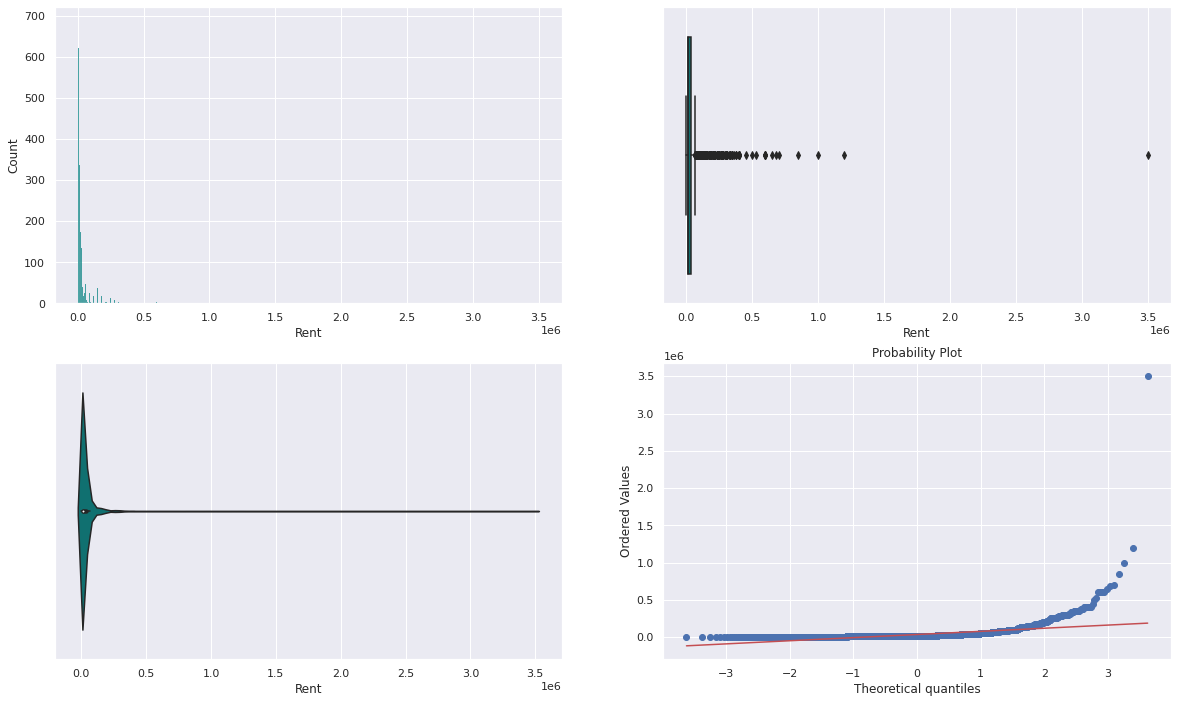

In [8]:
fig, ax = plt.subplots(2, 2, figsize=(20, 12))
ax1 = sns.histplot(x = data['Rent'], color='teal', ax= ax[0, 0])
ax2 = sns.boxplot(x = data['Rent'], ax= ax[0, 1], color= 'teal')
ax3 = sns.violinplot(x = data['Rent'], ax= ax[1, 0], color= 'teal')
ax4 = probplot(data['Rent'], plot=pylab)
pylab.show()

There are definitely some outliers present here which might cause problems later during modelling, therefore, I will apply boxcox transformation to it and I will also remove some of the extreme outliers

In [9]:
max_rent = data['Rent'].max()
index_max_rent = data[data['Rent'] == max_rent].index
data = data.drop(index_max_rent)

bc_result = boxcox(data['Rent'])
boxcox_y = bc_result[0]
lam = bc_result[1]

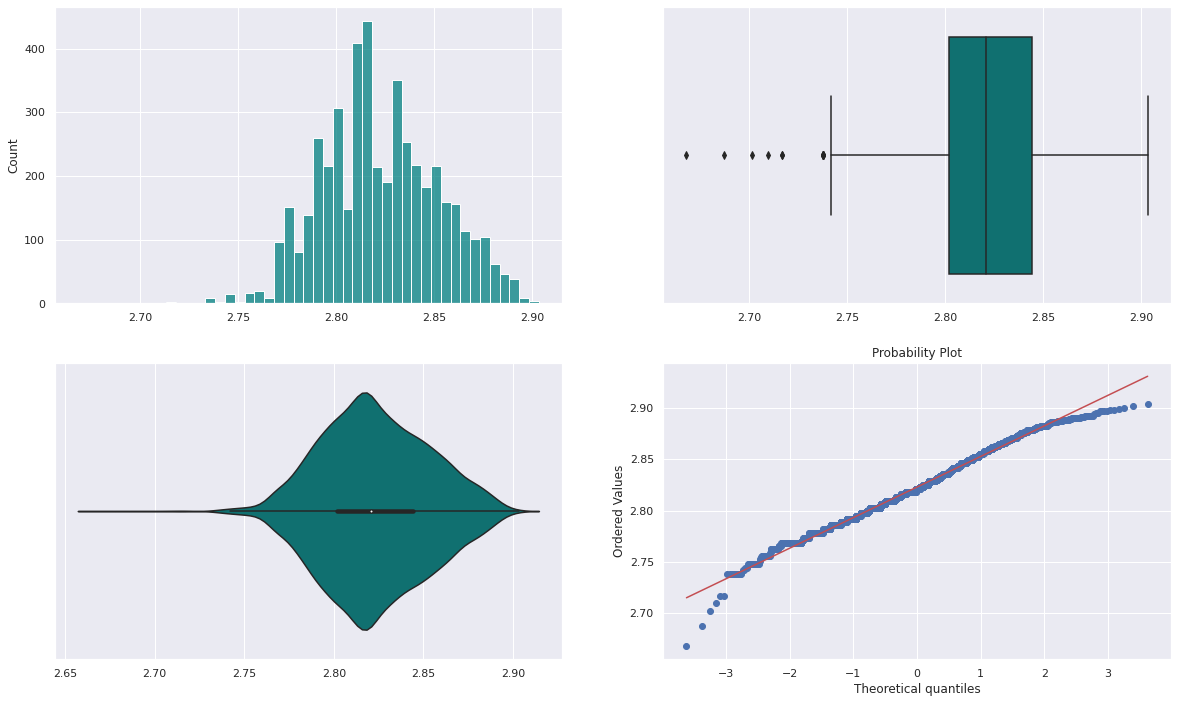

In [10]:
fig, ax = plt.subplots(2, 2, figsize=(20, 12))
ax1 = sns.histplot(x = boxcox_y, color='teal', ax= ax[0, 0])
ax2 = sns.boxplot(x = boxcox_y, ax= ax[0, 1], color= 'teal')
ax3 = sns.violinplot(x = boxcox_y, ax= ax[1, 0], color= 'teal')
ax4 = probplot(boxcox_y, plot=pylab)
pylab.show()

This is clearly much better now, distribution doesn't seem to be skewed that much as compared to previous one

### **Checking distribution of `size`**

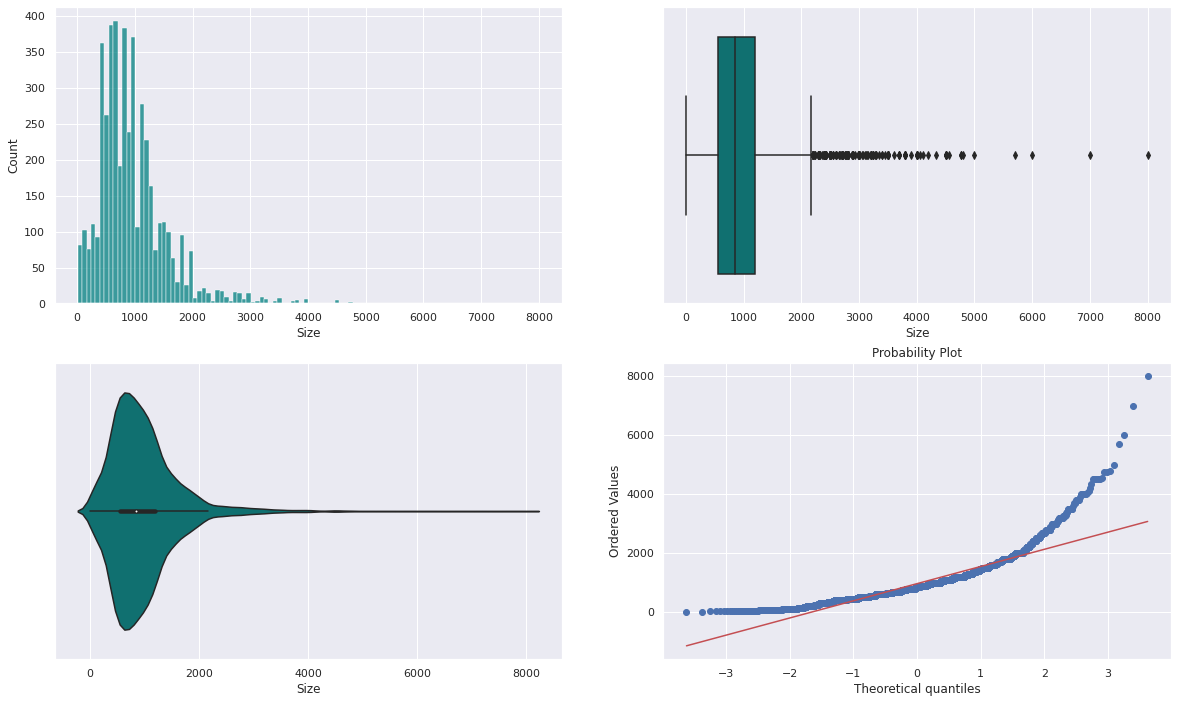

In [11]:
fig, ax = plt.subplots(2, 2, figsize=(20, 12))
ax1 = sns.histplot(x = data['Size'], color='teal', ax= ax[0, 0])
ax2 = sns.boxplot(x = data['Size'], ax= ax[0, 1], color= 'teal')
ax3 = sns.violinplot(x = data['Size'], ax= ax[1, 0], color= 'teal')
ax4 = probplot(data['Size'], plot=pylab)
pylab.show()

Distribution of size is skewed as well, let us apply boxcox transformation to this feature as well

In [12]:
data['Size'] = boxcox(data['Size'])[0]

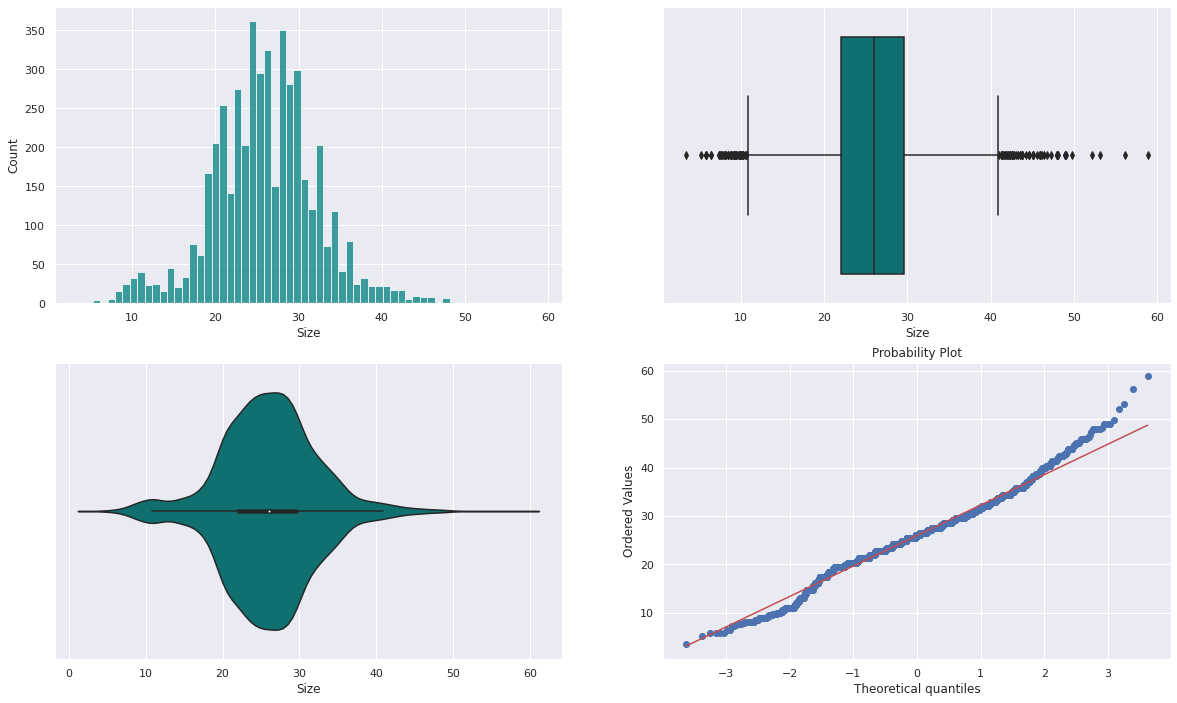

In [13]:
fig, ax = plt.subplots(2, 2, figsize=(20, 12))
ax1 = sns.histplot(x = data['Size'], color='teal', ax= ax[0, 0])
ax2 = sns.boxplot(x = data['Size'], ax= ax[0, 1], color= 'teal')
ax3 = sns.violinplot(x = data['Size'], ax= ax[1, 0], color= 'teal')
ax4 = probplot(data['Size'], plot=pylab)
pylab.show()

### **Plotting categorical variables vs Rent**

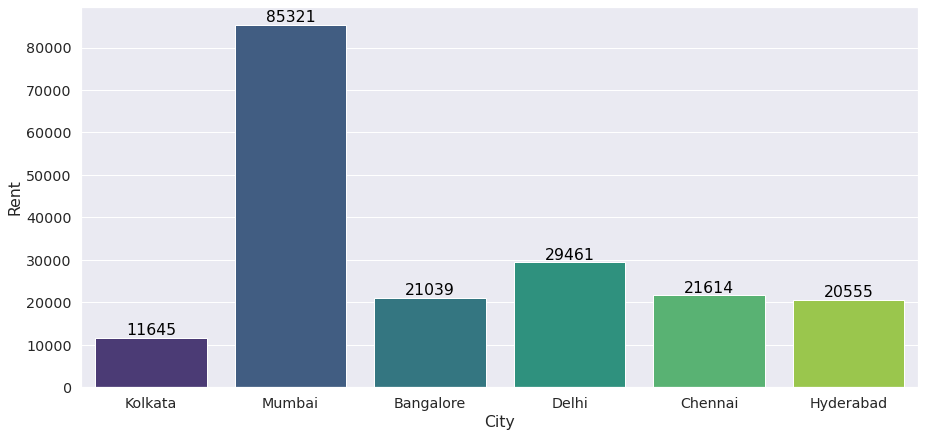

In [14]:
sns.set_context('notebook', font_scale = 1.3)
plt.figure(figsize=(15, 7))
ax = sns.barplot(x=data['City'], 
                 y=data['Rent'], 
                 palette='viridis',
                 ci = None)
plt.ylabel('Rent');

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.4, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'Black')

Mumbai has the highest Rent followed by Delhi

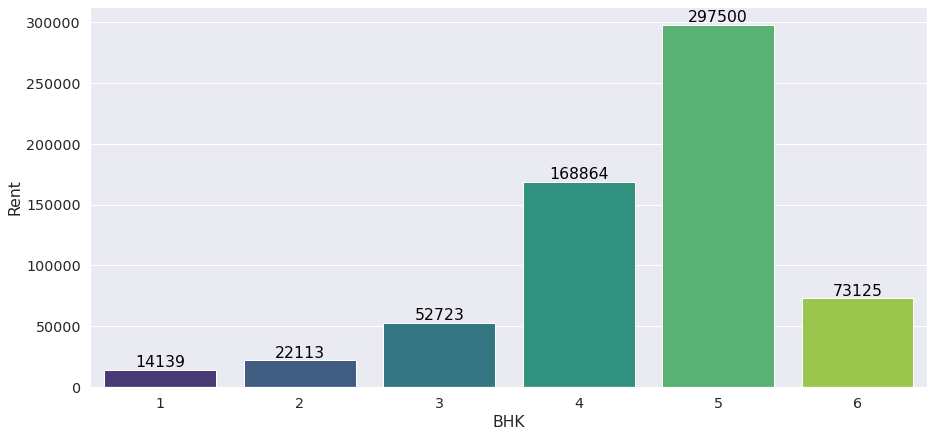

In [15]:
sns.set_context('notebook', font_scale = 1.3)
plt.figure(figsize=(15, 7))
ax = sns.barplot(x=data['BHK'].sort_values(ascending=True), 
                 y=data['Rent'], 
                 palette='viridis',
                 ci = None)
plt.ylabel('Rent');

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.4, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'Black')

In [16]:
data.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

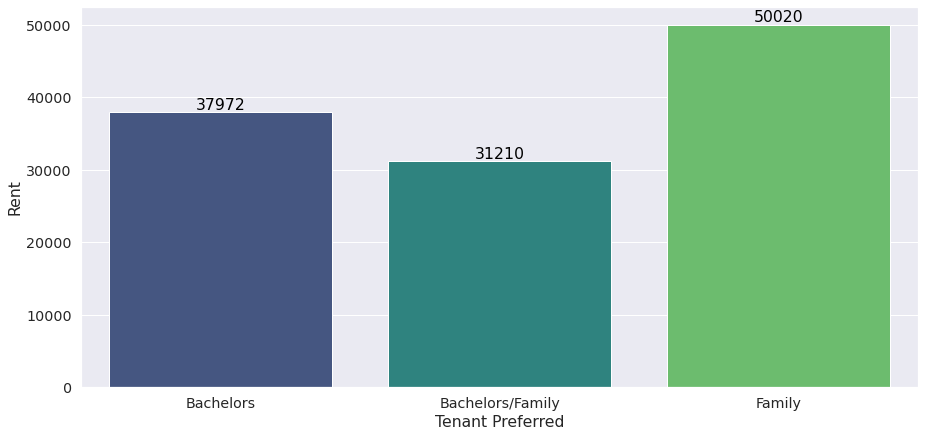

In [17]:
sns.set_context('notebook', font_scale = 1.3)
plt.figure(figsize=(15, 7))
ax = sns.barplot(x=data['Tenant Preferred'].sort_values(ascending=True), 
                 y=data['Rent'], 
                 palette='viridis',
                 ci = None)
plt.ylabel('Rent');

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.4, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'Black')

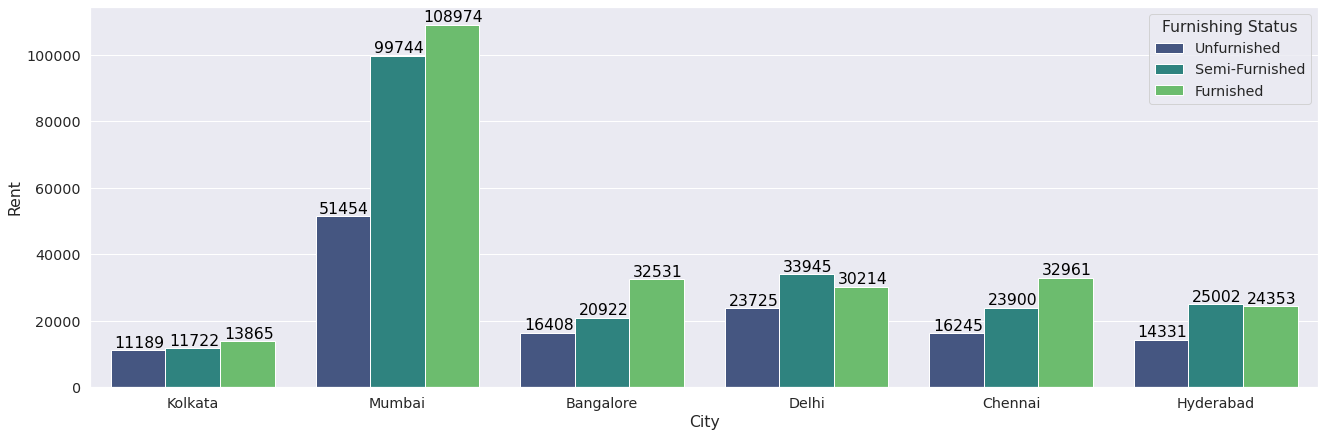

In [18]:
sns.set_context('notebook', font_scale = 1.3)
plt.figure(figsize=(22, 7))
ax = sns.barplot(x=data['City'], 
                 y=data['Rent'],
                 hue = data['Furnishing Status'], 
                 palette='viridis',
                 ci = None)
plt.ylabel('Rent');

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.14, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'Black')

Furnished Flat definitely has the highest rent (with the exception of Hyderabad). Also, a furnished flat in Mumbai will be the costliest if you are willing to rent a Flat/Apartment in case of these cities

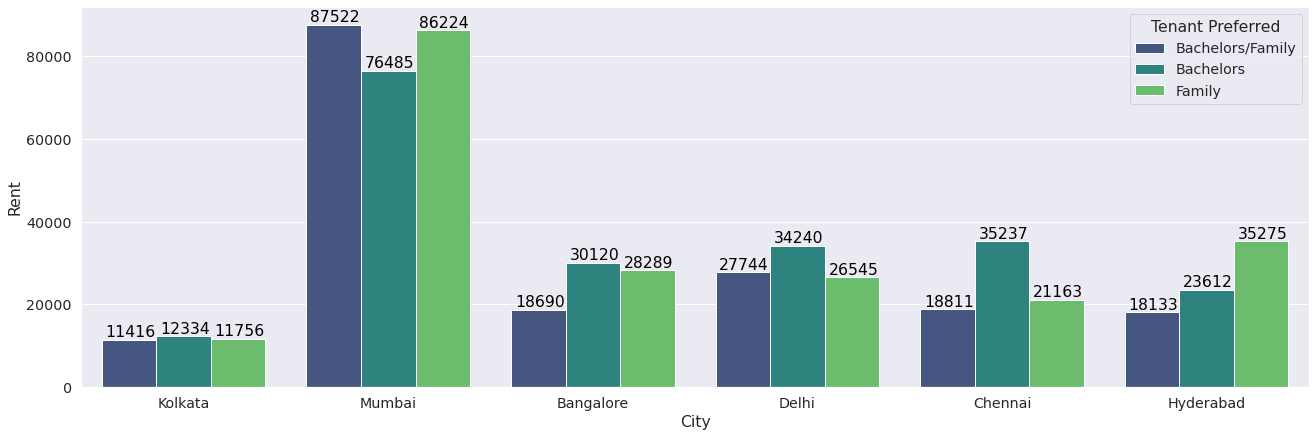

In [19]:
sns.set_context('notebook', font_scale = 1.3)
plt.figure(figsize=(22, 7))
ax = sns.barplot(x=data['City'], 
                 y=data['Rent'],
                 hue = data['Tenant Preferred'], 
                 palette='viridis',
                 ci = None)
plt.ylabel('Rent');

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.14, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'Black')

In [20]:
data = data[~data['Area Type'].str.contains("Built Area")]

In Chennai, Delhi and Bangalore, Bachelors usually have to pay more rent as compared to others

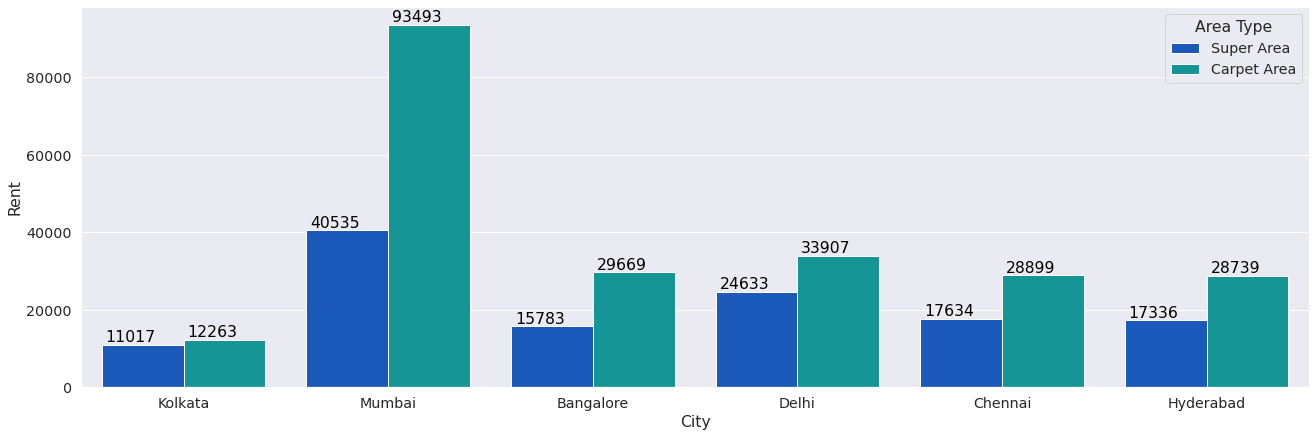

In [21]:
sns.set_context('notebook', font_scale = 1.3)
plt.figure(figsize=(22, 7))
ax = sns.barplot(x=data['City'], 
                 y=data['Rent'],
                 hue = data['Area Type'], 
                 palette='winter',
                 ci = None)
plt.ylabel('Rent');

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.14, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'Black')

<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
Feature Engineering
<a class="anchor" id="6"></a> 

### Inspired from [this](https://www.kaggle.com/code/leekahwin/in-depth-8-models-to-predict-rent-80) notebook

In [22]:
# Cleaing Floor Feature
data = data.join(data['Floor'].str.split(' out of ', 1, expand=True).rename(columns={0:'Floor Level', 1:'Total Floors'}))
data['Floor Level'] = data.apply(lambda x: 0 if x['Floor Level'] =='Ground' \
                                 else ( -1 if x['Floor Level'] =='Lower Basement' else (x['Total Floors']) ) , axis=1)

data.drop('Floor', axis=1, inplace=True)
data = data.dropna()
data['Floor Level'] = data['Floor Level'].astype(int)
data['Total Floors'] = data['Total Floors'].astype(int)

In [23]:
print(data['Point of Contact'].value_counts())
print()
print(data['Area Type'].value_counts())

Contact Owner      3210
Contact Agent      1528
Contact Builder       1
Name: Point of Contact, dtype: int64

Super Area     2444
Carpet Area    2295
Name: Area Type, dtype: int64


In [24]:
data = data[~data['Point of Contact'].str.contains("Contact Builder")]

In [25]:
data['month posted'] = data['Posted On'].dt.month
data['day posted'] = data['Posted On'].dt.day
data['day of week posted'] = data['Posted On'].dt.day_of_week
data['quarter poster'] = data['Posted On'].dt.quarter

data.drop('Posted On', axis = 1, inplace= True)

<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
Encoding
<a class="anchor" id="7"></a> 

In [26]:
print(data.duplicated().sum())
data = data.drop_duplicates()

4


In [27]:
def one_hot_encode(data, column):
    encoded = pd.get_dummies(data[column], drop_first= True)
    data = data.drop(column, axis = 1)
    data = data.join(encoded)
    return data

In [28]:
data = data.drop('Area Locality', axis= 1)

In [29]:
columns = ['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact']
for col in columns:
    data = one_hot_encode(data, col)

In [30]:
data.head()

,BHK,Rent,Size,Bathroom,Floor Level,Total Floors,month posted,day posted,day of week posted,quarter poster,...,Chennai,Delhi,Hyderabad,Kolkata,Mumbai,Semi-Furnished,Unfurnished,Bachelors/Family,Family,Contact Owner
0,2,10000,28.637810,2,0,2,5,18,2,2,...,0,0,0,1,0,0,1,1,0,1
1,2,20000,25.411055,1,3,3,5,13,4,2,...,0,0,0,1,0,1,0,1,0,1
2,2,17000,27.635366,1,3,3,5,16,0,2,...,0,0,0,1,0,1,0,1,0,1
3,2,10000,25.411055,1,2,2,7,4,0,3,...,0,0,0,1,0,0,1,1,0,1
4,2,7500,25.998850,1,2,2,5,9,0,2,...,0,0,0,1,0,0,1,0,0,1


It seems like our data is ready for modelling. Lets split the data first

In [31]:
X = data.drop('Rent', axis= 1)
y = data['Rent']

bc_result = boxcox(y)
y_boxcox = bc_result[0]
lambda_ = bc_result[1]

X_train, X_test, y_train, y_test = train_test_split(X, y_boxcox, test_size= 0.2, random_state = 42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [32]:
X_train.shape

(3787, 20)

<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
Modelling
<a class="anchor" id="8"></a> 

In [33]:
models = {
    'ridge' : Ridge(),
    'xgboost' : XGBRegressor(),
    'catboost' : CatBoostRegressor(verbose=0),
    'lightgbm' : LGBMRegressor(),
    'gradient boosting' : GradientBoostingRegressor(),
    'lasso' : Lasso(),
    'random forest' : RandomForestRegressor(),
    'bayesian ridge' : BayesianRidge(),
    'support vector': SVR(),
    'knn' : KNeighborsRegressor(n_neighbors = 4)
}

In [34]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f'{name} trained')

ridge trained
xgboost trained
catboost trained
lightgbm trained
gradient boosting trained
lasso trained
random forest trained
bayesian ridge trained
support vector trained
knn trained


### **ANN**

In [35]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(20))
model.add(tf.keras.layers.Dense(60))
model.add(tf.keras.layers.Dense(60))
model.add(tf.keras.layers.Dense(60))
model.add(tf.keras.layers.Dense(1))

model.compile(
    loss = 'mse', 
    optimizer = tf.keras.optimizers.Adam(), 
    metrics = [tf.keras.metrics.RootMeanSquaredError(name='rmse')]
)

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

2023-02-16 04:47:47.120223: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2023-02-16 04:47:47.255837: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
119/119 [==============================] - 1s 4ms/step - loss: 1.9635 - rmse: 1.4012 - val_loss: 0.0037 - val_rmse: 0.0605
Epoch 2/5
119/119 [==============================] - 0s 3ms/step - loss: 8.8093e-04 - rmse: 0.0297 - val_loss: 4.0281e-04 - val_rmse: 0.0201
Epoch 3/5
119/119 [==============================] - 0s 3ms/step - loss: 3.7552e-04 - rmse: 0.0194 - val_loss: 3.1848e-04 - val_rmse: 0.0178
Epoch 4/5
119/119 [==============================] - 0s 3ms/step - loss: 3.6981e-04 - rmse: 0.0192 - val_loss: 3.9221e-04 - val_rmse: 0.0198
Epoch 5/5
119/119 [==============================] - 0s 3ms/step - loss: 4.1752e-04 - rmse: 0.0204 - val_loss: 4.8368e-04 - val_rmse: 0.0220


In [36]:
RMSE_ann = model.evaluate(X_test, y_test)[1]
RMSE_ann

30/30 [==============================] - 0s 2ms/step - loss: 4.8368e-04 - rmse: 0.0220


0.021992633119225502

<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
Evaluation
<a class="anchor" id="9"></a> 

In [37]:
results = {}
kf = KFold(n_splits= 10)

for name, model in models.items():
    result = np.mean(np.sqrt(-cross_val_score(model, X_train, y_train, scoring = 'neg_mean_squared_error', cv= kf)))
    results[name] = result
    
results['ANN'] = RMSE_ann

In [38]:
for name, result in results.items():
    print(f"{name} : {round(result, 3)}")

ridge : 0.014
xgboost : 0.014
catboost : 0.014
lightgbm : 0.014
gradient boosting : 0.014
lasso : 0.03
random forest : 0.014
bayesian ridge : 0.014
support vector : 0.044
knn : 0.016
ANN : 0.022


In [39]:
results_df = pd.DataFrame(results, index=range(0,1)).T.rename(columns={0: 'RMSE'}).sort_values('RMSE', ascending=False)
results_df.T

,support vector,lasso,ANN,knn,ridge,bayesian ridge,xgboost,random forest,lightgbm,gradient boosting,catboost
RMSE,0.043586,0.029988,0.021993,0.015933,0.014435,0.014435,0.014212,0.014079,0.013986,0.013729,0.013579


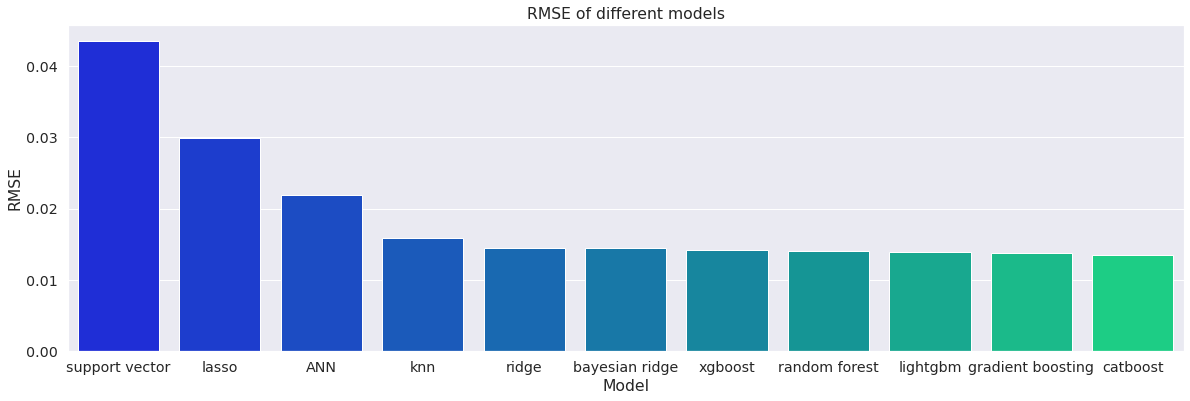

In [40]:
plt.figure(figsize = (20, 6))
sns.barplot(x= results_df.index, y = results_df['RMSE'], palette = 'winter')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE of different models');

Many of the models we tried are producing similar results, lets combine the prediction of best 5 models

In [41]:
final_predictions = (
    0.20 * inv_boxcox(models['catboost'].predict(X_test), lam) +
    0.20 * inv_boxcox(models['xgboost'].predict(X_test), lam) +
    0.20 * inv_boxcox(models['lightgbm'].predict(X_test), lam) + 
    0.20 * inv_boxcox(models['random forest'].predict(X_test), lam) + 
    0.20 * inv_boxcox(models['gradient boosting'].predict(X_test), lam)
)

In [42]:
print(f'RMSE: {np.sqrt(mean_squared_error(inv_boxcox(y_test, lam), final_predictions))}')
print(f'R-square: {r2_score(inv_boxcox(y_test, lam), final_predictions)}')

RMSE: 21214.56278004244
R-square: 0.797162907411147


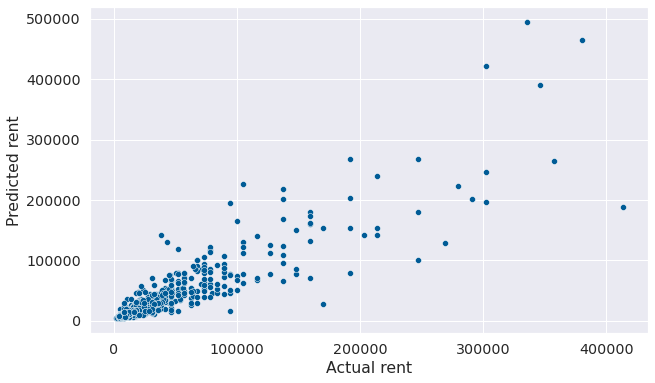

In [43]:
plt.figure(figsize= (10, 6))
sns.scatterplot(x= inv_boxcox(y_test, lam), y= final_predictions, color= '#005b96')
plt.xlabel('Actual rent')
plt.ylabel('Predicted rent')
plt.show()

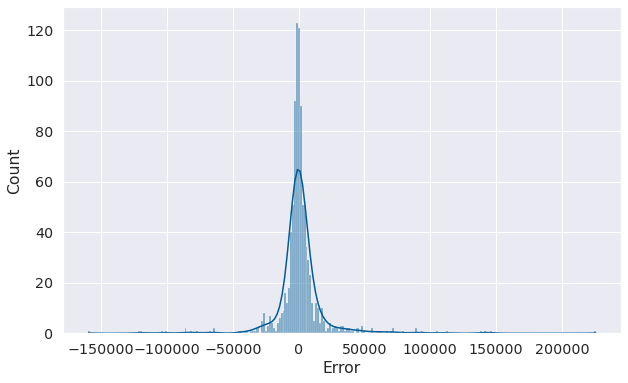

In [44]:
# Distribution of error
plt.figure(figsize = (10, 6))
sns.histplot(inv_boxcox(y_test, lam) - final_predictions, color = '#005b96', kde= True)
plt.xlabel('Error');

We have a R-square of 0.8 and the distribution of our residual is also normal, so our model is doing a good job in predicting the Rent